In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [32]:
def QjBasic(SAVE=False):
    '''
    Basic Tile EM Worker model 
    Compute the set of Worker qualities
    '''
    my_BBG  = pd.read_csv("my_ground_truth.csv")
    Qj=[]
    os.chdir(DATA_DIR)
    for object_id in tqdm(list(set(my_BBG.object_id))):
        ground_truth_match = my_BBG[my_BBG.object_id==object_id]
        x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
        T = Polygon(zip(x_locs,y_locs))
        tiles = pkl.load(open("vtiles{}.pkl".format(object_id)))
        indMat = pkl.load(open("indMat{}.pkl".format(object_id)))
        workers = pkl.load(open("worker{}.pkl".format(object_id)))
        for wid,j in zip(workers,range(len(workers))):
            Ncorrect=0
            Nwrong = 0
            for k in range(len(tiles)): 
                tk = tiles[k]
                ljk = indMat[j][k]
                try:
                    overlap = T.intersection(tk).area/T.area>0.8
                    tjkInT = T.contains(tk) or overlap
                except(shapely.geos.TopologicalError):
                    overlap=True
                    tjkInT = T.contains(tk)

                if (ljk ==1 and tjkInT) or (ljk ==0 and (not tjkInT)):
                    Ncorrect+=1
                elif (ljk ==1 and (not tjkInT)) or (ljk ==0 and tjkInT):
                    Nwrong+=1
            qj = Ncorrect/float(Ncorrect+Nwrong)
            Qj.append([object_id,wid,qj])
    Qj_tbl = pd.DataFrame(Qj,columns=["object_id","worker_id","Qj"])
    if SAVE: pkl.dump(Qj_tbl,open("Qj.pkl",'w'))
    os.chdir("..")
    return Qj


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [4]:
import shapely
from analysis_toolbox import *
import pandas as pd 
import numpy as np 
import pickle as pkl
from tqdm import tqdm 
#DATA_DIR="sampletopworst5"
DATA_DIR="final_all_tiles"

In [31]:
def correct(ljk,tjkInT):
    if (ljk ==1 and tjkInT) or (ljk ==0 and (not tjkInT)):
        return 1
    elif (ljk ==1 and (not tjkInT)) or (ljk ==0 and tjkInT):
        return 0

In [15]:
cd ../

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [26]:
def QjArea(SAVE=False):
    '''
    Area weighted worker quality scoring function
    '''
    my_BBG  = pd.read_csv("my_ground_truth.csv")
    Qj=[]
    os.chdir(DATA_DIR)
    for object_id in tqdm(list(set(my_BBG.object_id))):
        ground_truth_match = my_BBG[my_BBG.object_id==object_id]
        x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
        T = Polygon(zip(x_locs,y_locs))
        tiles = pkl.load(open("vtiles{}.pkl".format(object_id)))
        indMat = pkl.load(open("indMat{}.pkl".format(object_id)))
        workers = pkl.load(open("worker{}.pkl".format(object_id)))
        for wid,j in zip(workers,range(len(workers))):
            numerator=0
            denominator= 0
            for k in range(len(tiles)): 
                tk = tiles[k]
                ljk = indMat[j][k]
                try:
                    overlap = T.intersection(tk).area/T.area>0.8
                    tjkInT = T.contains(tk) or overlap
                except(shapely.geos.TopologicalError):
                    overlap=True
                    tjkInT = T.contains(tk)
                numerator+=tk.area*correct(ljk,tjkInT)
                denominator+=tk.area
            qj =numerator/float(denominator)
            Qj.append([object_id,wid,qj])
    Qj_tbl = pd.DataFrame(Qj,columns=["object_id","worker_id","Qj_area"])
    if SAVE: pkl.dump(Qj_tbl,open("Qj_area.pkl",'w'))
    os.chdir("..")
    return Qj_tbl

In [17]:
a = Qjarea()

 20%|██        | 2/10 [01:58<07:54,  0.02it/s]ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96 342, 94.7868 353.677) and LINESTRING (95.4525 347.27, 96 348) at 95.452471482889734 347.26996197718631
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96 342, 94.7868 353.677) and LINESTRING (95.4525 347.27, 96 348) at 95.452471482889734 347.26996197718631
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96 342, 94.7868 353.677) and LINESTRING (95.4525 347.27, 96 348) at 95.452471482889734 347.26996197718631
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96 342, 94.7868 353.677) and LINESTRING (95.4525 347.27, 96 348) at 95.452471482889734 347.26996197718631
ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (96 342, 94.7868 353.677) and LINESTRING (95.4525 347.27, 96 348) at 95.452471482889734 347.2699

In [27]:
Qj_tbl = pd.DataFrame(a,columns=["object_id","worker_id","Qj_area"])

In [28]:
Qj_all = pd.read_csv("final_all_tiles/worker_obj_qualities.csv")

In [29]:
Qj_all.head()

,object_id,worker_id,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall,Jaccard
0,1,75,0.492954,0.452618,0.502315,0.500000,0.492850,0.375,0.493176,0.25,0.493183,0.185230,0.951235,0.183488
1,1,114,0.348286,0.320449,0.354745,0.419355,0.347235,0.375,0.348235,0.25,0.348378,0.183556,0.992826,0.183312
2,1,116,0.641146,0.593516,0.652199,0.483871,0.643470,0.375,0.641647,0.25,0.641514,0.190723,0.962686,0.189323
3,1,118,0.466416,0.498753,0.458912,0.483871,0.466158,0.375,0.466588,0.25,0.466620,0.187262,0.949083,0.185400
4,1,133,0.268436,0.265586,0.269097,0.193548,0.269542,0.125,0.268706,0.25,0.268453,0.174196,0.980233,0.173586


In [30]:
Qj_tbl.merge(Qj_all)

,object_id,worker_id,Qj_area,Qj,Q1[A>1],Q2[A<1],Q1[A>10],Q2[A<10],Q1[A>50],Q2[A<50],Q1[A>100],Q2[A<100],Precision,Recall,Jaccard
0,1,75,0.064481,0.492954,0.452618,0.502315,0.500000,0.492850,0.375000,0.493176,0.250000,0.493183,0.185230,0.951235,0.183488
1,1,114,0.040791,0.348286,0.320449,0.354745,0.419355,0.347235,0.375000,0.348235,0.250000,0.348378,0.183556,0.992826,0.183312
2,1,116,0.075021,0.641146,0.593516,0.652199,0.483871,0.643470,0.375000,0.641647,0.250000,0.641514,0.190723,0.962686,0.189323
3,1,118,0.068261,0.466416,0.498753,0.458912,0.483871,0.466158,0.375000,0.466588,0.250000,0.466620,0.187262,0.949083,0.185400
4,1,133,0.024810,0.268436,0.265586,0.269097,0.193548,0.269542,0.125000,0.268706,0.250000,0.268453,0.174196,0.980233,0.173586
5,1,140,0.077841,0.481682,0.526185,0.471354,0.483871,0.481649,0.375000,0.481882,0.500000,0.481664,0.185389,0.932138,0.182921
6,1,131,0.072338,0.574448,0.586035,0.571759,0.500000,0.575548,0.375000,0.574824,0.250000,0.574753,0.190346,0.964787,0.189032
7,1,146,0.806076,0.829263,0.877805,0.817998,0.870968,0.828646,0.750000,0.829412,0.500000,0.829572,0.944169,0.929920,0.881451
8,1,148,0.079591,0.575388,0.589776,0.572049,0.483871,0.576740,0.375000,0.575765,0.250000,0.575693,0.189612,0.939910,0.187341
9,1,137,0.049155,0.400188,0.392768,0.401910,0.387097,0.400381,0.250000,0.400471,0.250000,0.400329,0.173717,0.964327,0.172608


In [34]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


# Area weighted p(T')

In [69]:
def AreaTprimeScore(objid,Tprime,T):
    '''
    Area-Weighted Tile EM Worker model 
    Given a tile combination Tprime, compute area-weighted score for that T'=T
    '''
    Qj=pkl.load(open("Qj_area.pkl",'r'))
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    workers = pkl.load(open("worker{}.pkl".format(objid)))
    indicatorMat= pkl.load(open("indMat{}.pkl".format(objid)))
    TprimeScore=0
    for k in Tprime: 
        for j in range(len(workers)):
            tk = tiles[k]
            ljk = indicatorMat[j][k]
            wid=workers[j]
            tjkInT = T.contains(tk) #overlap > threshold
            qj = float(Qj[(Qj["object_id"]==objid)&(Qj["worker_id"]==wid)]["Qj_area"])
            if tjkInT: 
                if ljk ==1:
                    TprimeScore+=qj
                    #print +qj
                else: 
                    TprimeScore-=qj
                    #print -qj
            else: 
                if ljk==1:
                    TprimeScore-=qj
                    #print -qj
                else: 
                    TprimeScore+=qj
                    #print +qj
        #print "score(T'):",TprimeScore
    return TprimeScore

In [49]:
Qj=pkl.load(open("Qj_area.pkl",'r'))

In [44]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [41]:
from TileEM_plot_toolbox import *
from scatter_toolbox import *
df = pd.read_csv("final_all_tiles/all_tile_combo_metric_snowball.csv",index_col=0)
# def add_column_to_Tprime_tbl(df,func,func_name):
#     val_lst=[]
val_dic = {}
for Tprime_data in tqdm(df.iterrows()):
    #Tprime_data=df._ix[i]
    objid = Tprime_data[1]["objid"]
    Tprime_idx = ast.literal_eval(Tprime_data[1]["T prime"])
    tiles = pkl.load(open("final_all_tiles/vtiles{}.pkl".format(objid)))
#     val_lst.append(func(objid,Tprime_idx,tiles))
# df[func_name]=val_lst
# return df

45it [00:03, 12.20it/s]Exception KeyboardInterrupt: KeyboardInterrupt() in <bound method Polygon.__del__ of <shapely.geometry.polygon.Polygon object at 0x10f003a10>> ignored
73it [00:06, 12.01it/s]Exception KeyboardInterrupt in <bound method Polygon.__del__ of <shapely.geometry.polygon.Polygon object at 0x10fd5c350>> ignored
89it [00:07, 11.98it/s]

KeyboardInterrupt: 

In [60]:
t_area = [t.area for t in tiles]

(0, 5)

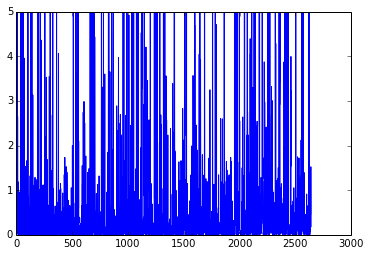

In [66]:
plt.plot(t_area)
plt.ylim(0,5)

In [70]:
AreaTprimeScore(objid,Tprime_idx,T)

-139.4903244035636

In [117]:
cd ..

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [141]:
df = pd.read_csv("final_all_tiles/all_tile_combo_metric_snowball.csv",index_col=0)

my_BBG  = pd.read_csv("my_ground_truth.csv")
def add_column_to_Tprime_tbl(df,func_name_lst):
    all_val_lst=[]
    for Tprime_data in tqdm(df.iterrows()):
        #Tprime_data=df._ix[i]
        objid = Tprime_data[1]["objid"]
        Tprime_idx = ast.literal_eval(Tprime_data[1]["T prime"])
        tiles = pkl.load(open("final_all_tiles/vtiles{}.pkl".format(objid)))
        # Ground truth 
        ground_truth_match = my_BBG[my_BBG.object_id==objid]
        x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
        BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
        ########### Insert Function calls here ############
        #for func in func_lst: 
        os.chdir("final_all_tiles/")
        val_lst=[]
        val_lst.append(AreaTprimeScore(objid,Tprime_idx,BBG))
        for A_percentile in [90,95,99]:
            val_lst.append(pTprimeGTLSA(objid,Tprime_idx,BBG,A_percentile))
        all_val_lst.append(val_lst)
        os.chdir("..")
    funcVal = np.array(all_val_lst).T
    print shape(funcVal)
    print funcVal
    #print len(funcVal[0])
    #print len(df)
    for func_name,val_lst in zip(func_name_lst,funcVal): 
        df[func_name]=val_lst 
    return df

In [148]:
log(0)

-inf

In [149]:
def pTprimeGTLSA(objid,Tprime,T,A_percentile):
    '''
    Area Based Tile EM Worker model 
    Given a tile combination Tprime, compute likelihood of that T'=T
    '''
    Qj=pkl.load(open("Qgt12_A>{}%.pkl".format(A_percentile),'r'))
    Qj_obj = Qj[(Qj["object_id"]==objid)]
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    workers = pkl.load(open("worker{}.pkl".format(objid)))
    indicatorMat= pkl.load(open("indMat{}.pkl".format(objid)))
    tile_area = np.array(indMat[-1])
    A_thres = np.percentile(tile_area,A_percentile)
    plk=1    
    for k in Tprime: 
        for j in range(len(workers)):
            tk = tiles[k]
            ljk = indicatorMat[j][k]
            tjkInT = T.contains(tk) 
            wid=workers[j]
            qp1 = float(Qj_obj[Qj_obj["worker_id"]==wid]["Qp1"])
            qp2 = float(Qj_obj[Qj_obj["worker_id"]==wid]["Qp2"])
            qn1 = float(Qj_obj[Qj_obj["worker_id"]==wid]["Qn1"])
            qn2 = float(Qj_obj[Qj_obj["worker_id"]==wid]["Qn2"])
            if tk.area>A_thres:
                if ljk ==1:
                    if tjkInT:
                        plk+=np.log(qp1)
                    else:
                        plk+=np.log(1-qn1)
                else:
                    if tjkInT:
                        plk+=np.log(1-qp1)
                    elif not tjkInT:
                        plk+=np.log(qn1)
            else:
                if ljk ==1:
                    if tjkInT:
                        plk+=np.log(qp2)
                    else:
                        plk+=np.log(1-qn2)    
                else:
                    if tjkInT:
                        plk+=np.log(1-qp2)
                    else:
                        plk+=np.log(qn2)
    return plk

In [129]:
def AreaTprimeScore(objid,Tprime,T):
    '''
    Area-Weighted Tile EM Worker model 
    Given a tile combination Tprime, compute area-weighted score for that T'=T
    '''
    Qj=pkl.load(open("Qj_area.pkl",'r'))
    tiles = pkl.load(open("vtiles{}.pkl".format(objid)))
    workers = pkl.load(open("worker{}.pkl".format(objid)))
    indicatorMat= pkl.load(open("indMat{}.pkl".format(objid)))
    TprimeScore=0
    for k in Tprime: 
        for j in range(len(workers)):
            tk = tiles[k]
            ljk = indicatorMat[j][k]
            wid=workers[j]
            tjkInT = T.contains(tk) #overlap > threshold
            qj = float(Qj[(Qj["object_id"]==objid)&(Qj["worker_id"]==wid)]["Qj_area"])
            if tjkInT: 
                if ljk ==1:
                    TprimeScore+=qj
                    #print +qj
                else: 
                    TprimeScore-=qj
                    #print -qj
            else: 
                if ljk==1:
                    TprimeScore-=qj
                    #print -qj
                else: 
                    TprimeScore+=qj
                    #print +qj
        #print "score(T'):",TprimeScore
    return TprimeScore

In [151]:
new_df = add_column_to_Tprime_tbl(df[:2],["AreaTprimeScore","pTprimeGTLSA[Athres>90%]","pTprimeGTLSA[Athres>95%]","pTprimeGTLSA[Athres>99%]"])

(4, 2)
[[ -90.5967724   -15.94243655]
 [-111.1086636  -364.12465597]
 [ -94.71890151 -327.002146  ]
 [         -inf          -inf]]


In [152]:
len(df)

4200

In [140]:
new_df

array([[ -90.5967724 ,  -15.94243655],
       [-111.1086636 , -364.12465597],
       [ -94.71890151, -327.002146  ],
       [         -inf,          -inf]])

In [145]:
Qj=pkl.load(open("final_all_tiles/Qgt12_A>99%.pkl",'r'))

In [150]:
Qj.head()

,object_id,worker_id,Qp1,Qp2,Qn1,Qn2
0,1,75,1,0.426136,0.421053,0.502577
1,1,114,1,0.952652,0.368421,0.260646
2,1,116,1,0.600379,0.394737,0.649037
3,1,118,1,0.405303,0.421053,0.474912
4,1,133,1,0.691288,0.105263,0.208571
